##  Análise Exploratória
Objetivo:
Este notebook realiza uma análise exploratória inicial do conjunto de dados de clientes, examinando distribuições, correlações e características gerais.

In [1]:
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn

from platform import python_version
from ydata_profiling import ProfileReport

from src.config import DADOS_ORIGINAIS, DADOS_LIMPOS, RELATORIO
from src.graficos import PALETTE

sns.set_theme(palette="terrain")

#pandas configurando para mostrar todas as linhas e colunas
pd.set_option ('display.max_columns', None)
#configurando pandas para não mostrar notação científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)


bibliotecas = {
    "Pandas": pd,
    "Matplotlib": matplotlib,
    "Seaborn": sns,
    "NumPy": np,
    "Scikit-Learn": sklearn,
}

print("Versões das bibliotecas:\n")
print(f"{'':-^20} | {'':-^10}")
print(f"{'Biblioteca':^20} | {'Versão':^10}")
print(f"{'':-^20} | {'':-^10}")

for nome, biblioteca in sorted(bibliotecas.items()):
    print(f"{nome:<20} | {biblioteca.__version__:>10}")

print()
print(f"Versão do Python: {python_version()}")



Versões das bibliotecas:

-------------------- | ----------
     Biblioteca      |   Versão  
-------------------- | ----------
Matplotlib           |      3.9.2
NumPy                |     1.26.4
Pandas               |      2.2.3
Scikit-Learn         |      1.5.1
Seaborn              |     0.13.2

Versão do Python: 3.12.3


In [2]:
df = pd.read_csv(DADOS_ORIGINAIS)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


In [5]:
df["Gender"].value_counts(normalize=True)*100

Gender
Female   56.00
Male     44.00
Name: proportion, dtype: float64

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df[df.duplicated("CustomerID")]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


In [8]:
df_analise = df.copy()
df_analise = df_analise.drop(columns=["CustomerID"])

df_analise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [9]:
profile= ProfileReport(df)
profile.to_file(RELATORIO)
#relatório dentro da pasta relatorios

In [ ]:
O pairplot (do Seaborn) é um gráfico que mostra:

Na diagonal: Distribuições de cada variável (usando KDE - Kernel Density Estimate)

Fora da diagonal: Relações entre pares de variáveis (scatter plots)

Quando usado com hue='Gender', diferencia visualmente os gêneros

O pairplot ajuda a identificar:

Padrões ou tendências nas relações entre variáveis

Diferenças de comportamento entre gêneros

Formas das distribuições das variáveis

Possíveis outliers ou anomalias nos dados

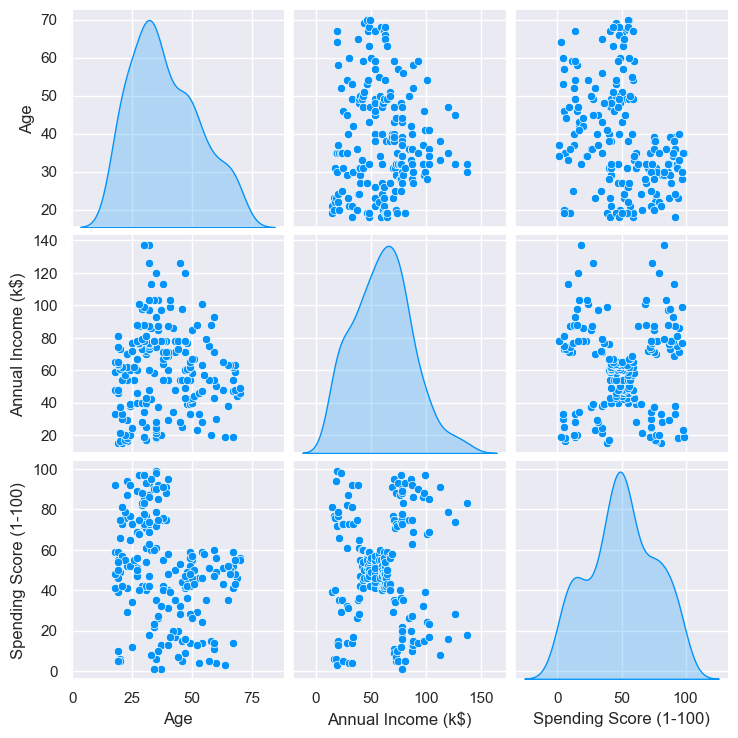

In [10]:
sns.pairplot(df_analise, diag_kind='kde')

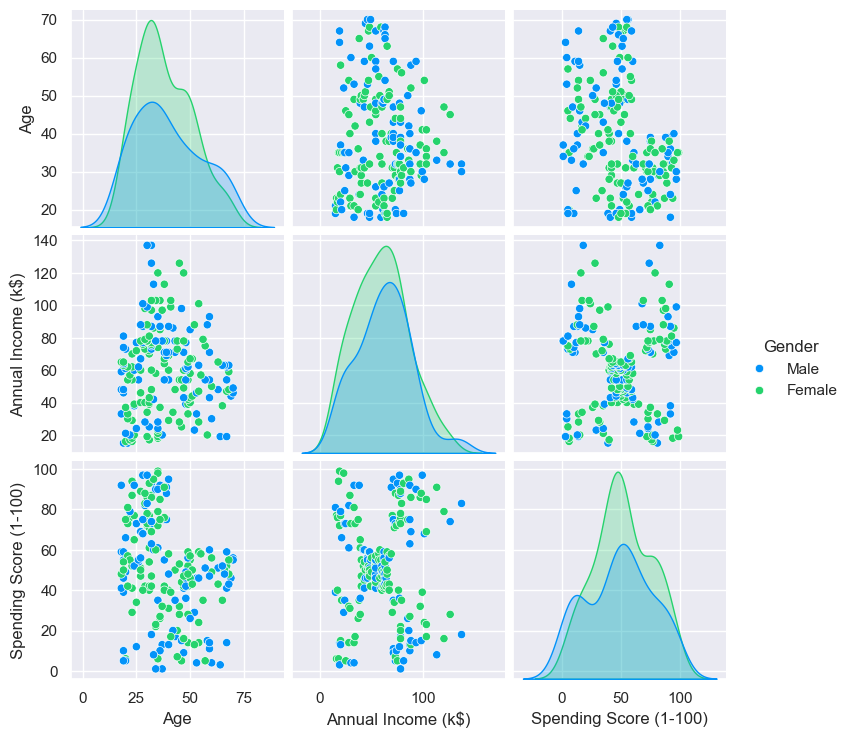

In [19]:
sns.pairplot(df_analise, diag_kind='kde', hue='Gender')

In [ ]:
#Observando as variáveis "Anual Income" x  "Spending Score" é possível observar 5 agrupamentos principais 

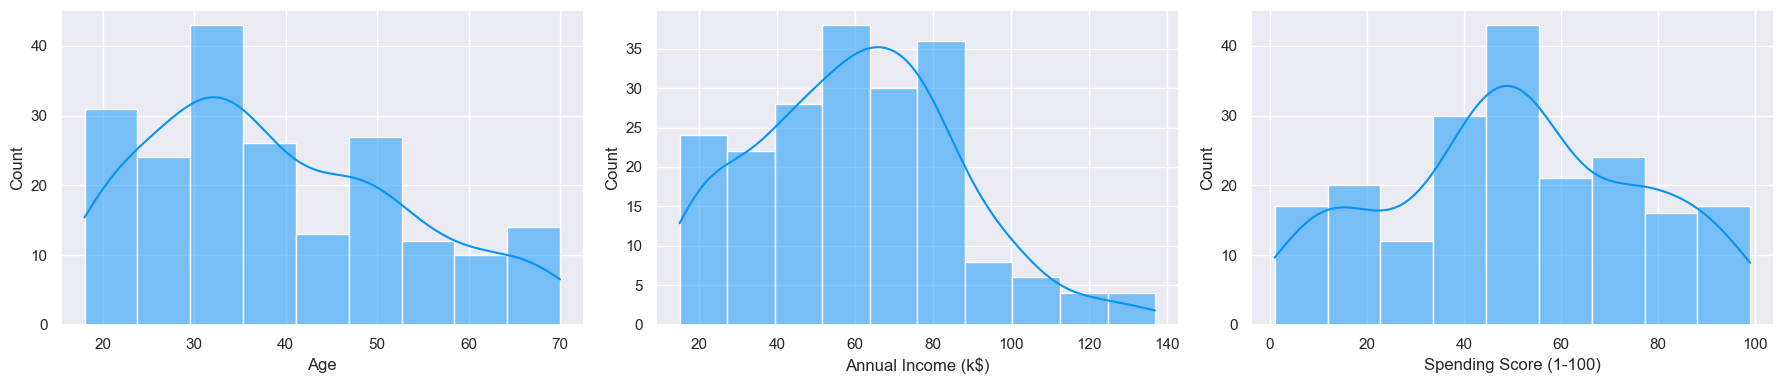

In [11]:
#Histograma complementa a análise do pairplot, mostrando em detalhe a distrivuição dos dados
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

for ax, coluna in zip(axs.flatten(), df_analise.select_dtypes("number").columns):
    sns.histplot(x=coluna, ax=ax, data=df_analise, kde=True)

plt.tight_layout()
plt.show()


Assim como o histograma o boxplot complementa a análise feita pelo pairplot.  

Permite visualizar rapidamente a distribuição dos dados, valores discrepantes, quartis,  mediana, valores mínumos e máximos, comprimento da cauda dos dados, tendência central etc.

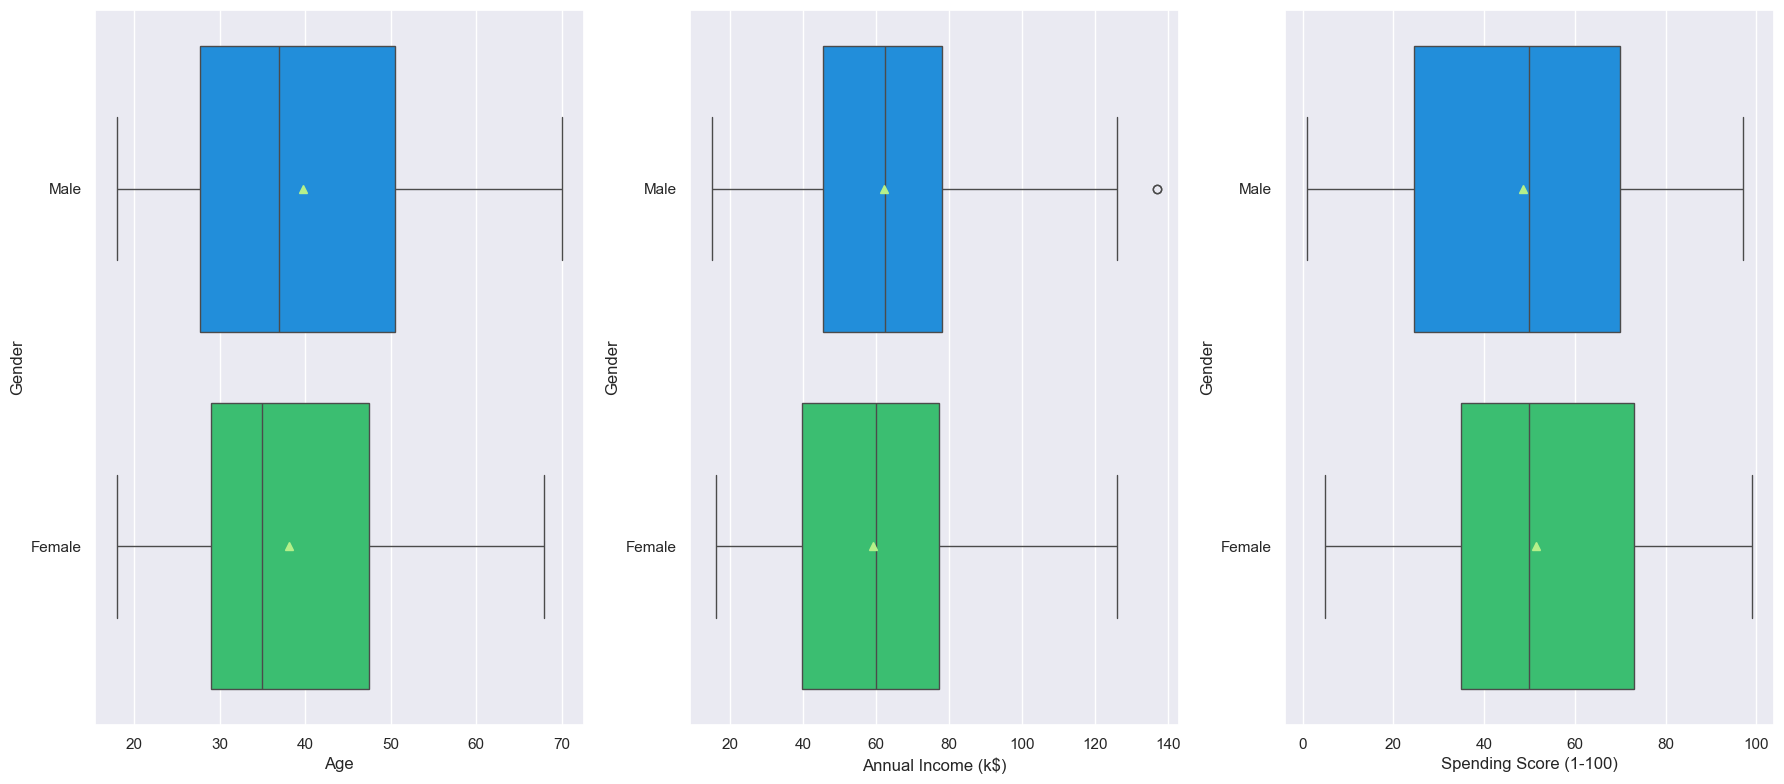

In [13]:

fig, axs = plt.subplots(1, 3, figsize=(18, 8))
for ax, coluna in zip(axs.flatten(), df_analise.select_dtypes("number").columns):
    sns.boxplot(x=coluna, ax=ax, data=df_analise, showmeans=True, y="Gender", hue="Gender")

plt.tight_layout()
plt.show()


In [14]:
#avaliar correlação entre as variáveis
display(df_analise.select_dtypes("number").corr(method="spearman"))


,Age,Annual Income (k$),Spending Score (1-100)
Age,1.00,0.02,-0.34
Annual Income (k$),0.02,1.00,0.01
Spending Score (1-100),-0.34,0.01,1.00


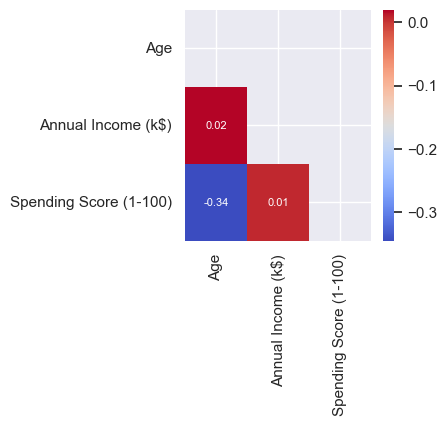

In [15]:
#analisar correlação entre as colunas
matriz = np.triu(df_analise.select_dtypes("number").corr(method="spearman"))

fig, ax = plt.subplots(figsize=(3, 3))

sns.heatmap(
    df_analise.select_dtypes("number").corr("spearman"),
    mask=matriz,
    annot=True,
    fmt=".2f",
    ax=ax,
    cmap=PALETTE,
    annot_kws={"fontsize": 8}
)

plt.show()

In [18]:
df_analise.to_parquet(DADOS_LIMPOS, index=False)

## Conclusão - Análise Exploratória (EDA)

O EDA revelou padrões fundamentais sobre o comportamento dos clientes:

Distribuições:

A base é equilibrada em gênero (56% mulheres, 44% homens).

Spending Score e Annual Income têm distribuições amplas, ideais para segmentação.

Correlação negativa entre Age e Spending Score (-0.34): clientes mais jovens tendem a gastar mais.

Segmentação Inicial:

O pairplot mostrou potencial para agrupamentos naturais, especialmente nas relações entre renda e gastos.

Boxplots por gênero indicaram que homens jovens têm maior dispersão nos gastos.